In [1]:
import os
os.chdir('../')

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.externals import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import sklearn.neural_network as nn
from lib.general_model import general_model
from lib.prediction_module import prediction_prob

#### Vectorize and Transform Model

Importing pickled data and vectorizing the text of each tweet for each user using the a term frequency–inverse document frequency vectorizer (TfidfVectorizer).  Then TruncatedSVD is used to reduce the feature dementionality to 500.

In [3]:
raw_data1 = pd.read_pickle('data/pickles/all_tweets1_df.pkl')
raw_data1.head()

IOError: [Errno 2] No such file or directory: 'data/pickles/all_tweets1_df.pkl'

In [4]:
tfid_1 = TfidfVectorizer(stop_words='english', decode_error='replace', use_idf=True, max_df=2.0)
tfid_trans_1 = tfid_1.fit_transform(raw_data1['text'])

In [5]:
joblib.dump(tfid_1, "tfid_1.pkl")
from_pkl_cls = joblib.load("tfid_1.pkl")

In [6]:
svd_1 = TruncatedSVD(n_components=500, n_iter=100)
transformed_X = pd.DataFrame(svd_1.fit_transform(tfid_trans_1))

In [7]:
joblib.dump(svd_1, "svd_1.pkl")
from_pkl_cls = joblib.load("svd_1.pkl")

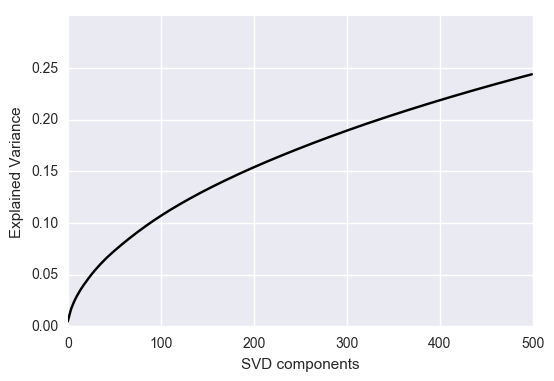

In [8]:
x = range(500)
plt.plot(x, np.cumsum(svd_1.explained_variance_ratio_), color='black')
plt.ylim(0, 0.3)

plt.xlabel('SVD components')
plt.ylabel('Explained Variance')
plt.show()

#### Label Encode Target and Train Test Split

In [9]:
y = raw_data1['user']
X = transformed_X 

In [10]:
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=50 )
data_dict = {
             'X_test' : X_test,
             'X_train' : X_train,
             'y_test' : y_test,
             'y_train' : y_train} 

In [29]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    return a

#### Logistic Regression

In [30]:
log_reg = LogisticRegression(penalty='l2', C=1)

In [31]:
evaluate_model(log_reg)

[[869  11  11   7   2  25   6  16   0   3   7  22]
 [  4 601 104  36  16 104   7  28   1  26  14  11]
 [  3  41 662  18  19 100  19  51   0   9  13  44]
 [ 22  51  46 601   6  57  11  45   1  17  89   8]
 [  3  21  23  12 732  28  18  64   0  21  14  18]
 [  5  58 120  23  19 621  10  85   0  10  24  31]
 [  6  20  11  19  21  20 580  99   1  14  19  37]
 [  7  32 104  32  26  98  42 532   0  20  20  60]
 [  1   6  48  10   0   5   0   8 825   9  16  13]
 [  3  22  70  19  14  53   6  56   0 667  19  30]
 [ 24   8  35  70   5  25  22  12   0  11 732   4]
 [ 12  17  36  26  12  38  31  70   0  13  15 681]]
             precision    recall  f1-score   support

          0       0.91      0.89      0.90       979
          1       0.68      0.63      0.65       952
          2       0.52      0.68      0.59       979
          3       0.69      0.63      0.66       954
          4       0.84      0.77      0.80       954
          5       0.53      0.62      0.57      1006
          6    

0.70811850039325352

#### Decision Trees

In [15]:
dec_tree = DecisionTreeClassifier(criterion='gini',max_depth=None, min_samples_split=3)
evaluate_model(dec_tree)

[[697  18  28  34  25  31  20  23   3  18  40  42]
 [ 15 456  97  62  34  94  36  62   9  31  25  31]
 [ 27  81 409  58  40 110  32  84   8  36  39  55]
 [ 40  73  64 332  47  69  54  60  14  28 141  32]
 [ 23  41  39  44 513  36  45  82   2  35  43  51]
 [ 43 107 129  77  51 319  35  88   8  42  49  58]
 [ 27  37  52  41  61  49 361  83   7  36  37  56]
 [ 25  58  90  68  70  81  77 325   6  62  46  65]
 [  8  11  33  12   0  11   8   8 830   6   4  10]
 [ 17  56  51  31  37  53  30  53   7 563  26  35]
 [ 31  36  39 144  41  46  38  44   4  29 469  27]
 [ 34  35  56  39  47  66  49  99   7  38  28 453]]
             precision    recall  f1-score   support

          0       0.71      0.71      0.71       979
          1       0.45      0.48      0.47       952
          2       0.38      0.42      0.40       979
          3       0.35      0.35      0.35       954
          4       0.53      0.54      0.53       954
          5       0.33      0.32      0.32      1006
          6    

0.50048064318797514

#### Random Forest

In [16]:
rand_for = RandomForestClassifier(n_estimators=50, min_samples_split=7, criterion='gini')
evaluate_model(rand_for)

[[854  13  15  22   2  20   7  14   0   4  10  18]
 [  8 547  55  70  31 155  10  26   2  14  23  11]
 [ 17  58 532  50  29 142  15  70   1   7  26  32]
 [ 22  38  35 527  23  84  24  37   2  10 139  13]
 [ 13  19   9  36 681  29  31  61   1  12  28  34]
 [ 26  72  93  45  42 550  17  68   1   5  44  43]
 [ 22  16  15  28  44  28 526  75   7   6  32  48]
 [ 19  36  81  50  53 122  62 455   2  15  28  50]
 [  6   6  35  10   0  14   1   6 849   3   9   2]
 [  4  18  38  26  21  69  25  44   3 655  30  26]
 [ 27  17  13 115  27  37  33  13   1   6 654   5]
 [ 37  20  31  33  36  44  43  57   0   8  21 621]]
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       979
          1       0.64      0.57      0.60       952
          2       0.56      0.54      0.55       979
          3       0.52      0.55      0.54       954
          4       0.69      0.71      0.70       954
          5       0.43      0.55      0.48      1006
          6    

0.65114043520055931

#### K Neighbors 

In [17]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute')
evaluate_model(knn)

[[737  15  22  14   5  31  41  32   6  31  22  23]
 [  5 470  90  40  20 115  43  62   5  62  10  30]
 [  6  60 558  25  28  86  28  82   9  48   9  40]
 [ 14  54  69 345  23  78  57  99  16  74  59  66]
 [  4  31  36  16 546  57  77  79   5  54   8  41]
 [ 12  74 118  33  41 421  46 120  11  64  16  50]
 [  4  25  31  13  18  36 494  89  12  58   6  61]
 [  8  43 112  15  31 113  66 446   5  58  10  66]
 [  0   6  44   9   2  10   6   8 836  11   2   7]
 [  3  22  49  12   7  49  12  42  14 702  10  37]
 [ 17  34  46  71  25  50  56  48  12  63 485  41]
 [  4  29  52  19  16  39  48  77   6  50   5 606]]
             precision    recall  f1-score   support

          0       0.91      0.75      0.82       979
          1       0.54      0.49      0.52       952
          2       0.45      0.57      0.51       979
          3       0.56      0.36      0.44       954
          4       0.72      0.57      0.64       954
          5       0.39      0.42      0.40      1006
          6    

0.58079175041510089

#### Extra Trees

In [18]:
ext_tree = ExtraTreesClassifier(n_estimators=50, criterion='entropy')
evaluate_model(ext_tree)

[[855  16  14  15   3  22  10  10   1   5  13  15]
 [ 14 545  69  57  38 109  18  35   2  16  24  25]
 [ 29  77 534  40  33 100  12  66   0  24  35  29]
 [ 49  61  39 501  33  64  25  43   1  15 113  10]
 [ 18  31  16  31 669  23  37  70   1   9  25  24]
 [ 29  88 116  72  52 458  20  73   0  17  35  46]
 [ 25  25  24  46  36  32 511  63   2  19  23  41]
 [ 30  48 100  49  48 101  66 421   0  20  21  69]
 [  7   5  39   7   0   9   3   5 853   3   5   5]
 [  8  21  44  27  27  54  19  44   3 668  17  27]
 [ 43  23  22 125  29  29  29  15   0  11 606  16]
 [ 44  24  25  36  32  37  41  66   3  14  21 608]]
             precision    recall  f1-score   support

          0       0.74      0.87      0.80       979
          1       0.57      0.57      0.57       952
          2       0.51      0.55      0.53       979
          3       0.50      0.53      0.51       954
          4       0.67      0.70      0.68       954
          5       0.44      0.46      0.45      1006
          6    

0.6317399283404701

#### Naive Bayes

In [19]:
gnb = GaussianNB()
evaluate_model(gnb)

[[682   7  31  25   7   4  31  21  28  87  15  41]
 [ 61 262  42  73  82  38  38  23  23 272  23  15]
 [ 44  21 224  60  94  32  53  29  33 328  46  15]
 [ 70  22  45 291  53  34  63  32  43 193  93  15]
 [ 30  14  46  46 488  29  52  24  40 158  17  10]
 [ 53  31  69  84  93 139  63  45  45 323  47  14]
 [ 44   9  21  45  42  18 361  21  32 218  24  12]
 [ 64  20  48  54  53  39  55 180  45 358  40  17]
 [ 60   0   9  11   2   3   6   5 716  92  29   8]
 [ 45  20  16  40  41  14  34  14  31 675  18  11]
 [ 77   9  36  69  42  20  33  25  43 127 444  23]
 [ 72  16  24  33  39  15  53  32  34 268  41 324]]
             precision    recall  f1-score   support

          0       0.52      0.70      0.60       979
          1       0.61      0.28      0.38       952
          2       0.37      0.23      0.28       979
          3       0.35      0.31      0.33       954
          4       0.47      0.51      0.49       954
          5       0.36      0.14      0.20      1006
          6    

0.41824696320894872

#### Multi-Layer Perceptron Neural Network 

In [20]:
mlpc = nn.MLPClassifier(verbose=2, max_iter=2000, activation = 'logistic', hidden_layer_sizes= (100,))                    
evaluate_model(mlpc)

Iteration 1, loss = 2.47272912
Iteration 2, loss = 2.43040224
Iteration 3, loss = 2.37460740
Iteration 4, loss = 2.29218334
Iteration 5, loss = 2.17589046
Iteration 6, loss = 2.02877012
Iteration 7, loss = 1.86750860
Iteration 8, loss = 1.70592183
Iteration 9, loss = 1.55634979
Iteration 10, loss = 1.42647260
Iteration 11, loss = 1.31847890
Iteration 12, loss = 1.23053203
Iteration 13, loss = 1.15941204
Iteration 14, loss = 1.10236429
Iteration 15, loss = 1.05527471
Iteration 16, loss = 1.01750860
Iteration 17, loss = 0.98486424
Iteration 18, loss = 0.95839533
Iteration 19, loss = 0.93550660
Iteration 20, loss = 0.91539992
Iteration 21, loss = 0.89889614
Iteration 22, loss = 0.88416615
Iteration 23, loss = 0.87141349
Iteration 24, loss = 0.85940239
Iteration 25, loss = 0.84907479
Iteration 26, loss = 0.84005125
Iteration 27, loss = 0.83164398
Iteration 28, loss = 0.82406116
Iteration 29, loss = 0.81704469
Iteration 30, loss = 0.81058497
Iteration 31, loss = 0.80531054
Iteration 32, los

0.72839290395875211

### Determine best model based on accuracy scores 

In [24]:
model_scores = {'LogisticRegression' : '71',
                'DecisionTrees' : '50',
                'RandomForrest' : '65',
                'KNeighbors' : '58',
                'ExtraTrees': '63',
                'NaiveBayes' : '42',
                'Neural Network' : '73'
               }

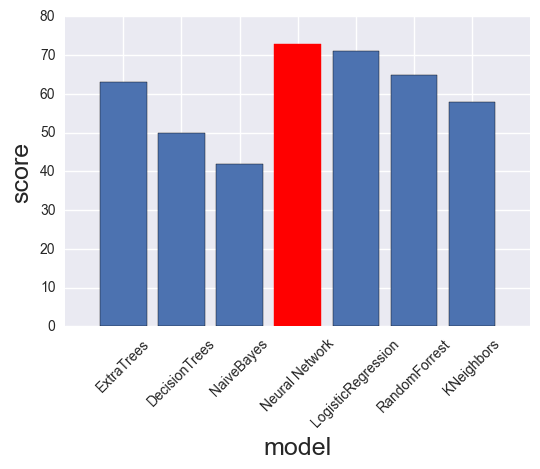

In [25]:
barlist = plt.bar(range(len(model_scores)), model_scores.values(), align='center')
plt.xticks(range(len(model_scores)), model_scores.keys(), rotation=45)
plt.xlabel('model', fontsize=18)
plt.ylabel('score', fontsize=18)
barlist[3].set_color('r')

### Pickle best model for new tweets

In [23]:
joblib.dump(mlpc, "MLPC_2.pkl")
from_pkl_cls = joblib.load("MLPC_2.pkl")